### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data importing

In [2]:
df_tweets = pd.read_csv("data/scored_tweets_total.csv")

##### Data

In [3]:
df_tweets.head()

,Stock,Datetime,user.screen_name,id_str,text,Sentiment,Known_Pumper,Price_Region,Inflection_Point
0,AXTG,2021-03-25 17:50:13+00:00,UCitnow,1375142994920271872a,#RT @ldev117: RT @UCitnow: @ShortSqueezed1 @EV...,0,0,1.0,NaN
1,AXTG,2021-03-25 17:50:48+00:00,UCitnow,1375143141058080768a,RT @UCitnow: #RT @ldev117: RT @UCitnow: @Short...,0,0,1.0,NaN
2,AXTG,2021-03-25 18:47:48+00:00,Rad7RR,1375157484063584261a,$AXTG Big OTC % Gainer!🚀🚀🚀,1,0,1.0,NaN
3,AXTG,2021-03-25 20:02:03+00:00,GetScanz,1375176172099747845a,Today’s Top Penny Stock Gainers\n\n$LTTGF $AXT...,1,0,1.0,NaN
4,AXTG,2021-03-25 20:02:48+00:00,christinebarnum,1375176361560604679a,RT @GetScanz: Today’s Top Penny Stock Gainers\...,1,0,1.0,NaN


##### Converting Datetime to datetime

In [4]:
df_tweets['Datetime'] = pd.to_datetime(df_tweets['Datetime'])

In [5]:
min_date = df_tweets['Datetime'].min()
max_date = df_tweets['Datetime'].max()

print("📆 Date range in the dataset:")
print("Start Date:", min_date)
print("End Date:  ", max_date)

📆 Date range in the dataset:
Start Date: 2021-03-23 03:32:08+00:00
End Date:   2021-04-09 01:14:21+00:00


### Plotting the stock tweet volume over time

/var/folders/q3/p7x07_8d2b9fv9qcmf0s6wyc0000gn/T/ipykernel_13147/724682068.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tweet_volume_hourly = df_tweets['text'].resample('H').count()
/var/folders/q3/p7x07_8d2b9fv9qcmf0s6wyc0000gn/T/ipykernel_13147/724682068.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/dominiccheong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dominiccheong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


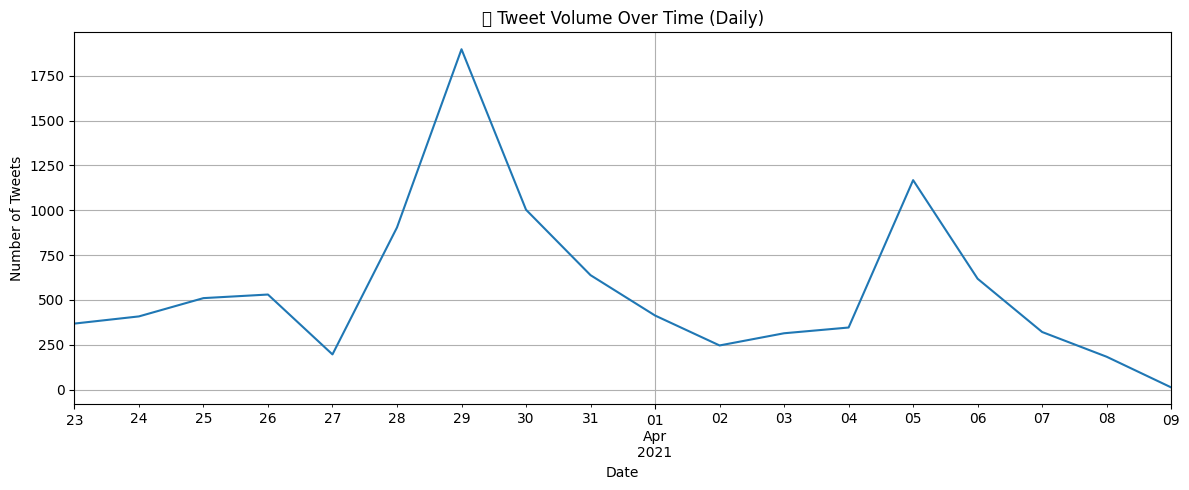

In [6]:
df_tweets.set_index('Datetime', inplace=True)

# 3. Resample by time interval and count tweets
# Daily
tweet_volume_daily = df_tweets['text'].resample('D').count()

# Hourly (if you want finer granularity)
tweet_volume_hourly = df_tweets['text'].resample('H').count()

# 4. Plotting the result
plt.figure(figsize=(12, 5))
tweet_volume_daily.plot()
plt.title('📅 Tweet Volume Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.tight_layout()
plt.show()

df_tweets.reset_index(inplace=True)

### Stock tickers

In [7]:
df_tweets["Stock"].unique()

array(['AXTG', 'CERPQ', 'WNRS', 'DPLN', 'SOL', 'GYST', 'TTCM', 'SEAC',
       'EEENF'], dtype=object)

In [8]:
d = {}

for stockname in df_tweets["Stock"]:
    if stockname not in d:
        d[stockname] = 0
    d[stockname] += 1

##### Stock counts

In [9]:
d

{'AXTG': 23,
 'CERPQ': 348,
 'WNRS': 132,
 'DPLN': 103,
 'SOL': 1674,
 'GYST': 1094,
 'TTCM': 518,
 'SEAC': 560,
 'EEENF': 5624}

### Stocks average volumes in this time frame

In [30]:
stock_data = pd.read_csv("data/stock_movement.csv")

In [12]:
stock_data

,Close,High,Low,Open,Volume,Stock,Adj Close
0,0.00620,0.00620,0.00620,0.00620,10000.0,AXTG,NaN
1,0.00644,0.00950,0.00644,0.00950,34000.0,AXTG,NaN
2,0.00638,0.00638,0.00635,0.00635,34670.0,AXTG,NaN
3,0.00638,0.00638,0.00638,0.00638,0.0,AXTG,NaN
4,0.00638,0.00638,0.00638,0.00638,0.0,AXTG,NaN
...,...,...,...,...,...,...,...
296,0.01530,0.01540,0.01350,0.01490,120446113.0,EEENF,NaN
297,0.01675,0.01790,0.01520,0.01520,151597742.0,EEENF,NaN
298,0.02200,0.02490,0.01740,0.01740,664644982.0,EEENF,NaN
299,0.01990,0.02350,0.01970,0.02350,240219112.0,EEENF,NaN


In [13]:
avg_volume_per_stock = stock_data.groupby("Stock")["Volume"].mean()

In [14]:
avg_volume_per_stock

Stock
AXTG     4.827529e+05
EEENF    3.464181e+08
GYST     7.319867e+06
SEAC     7.878216e+05
SOL      2.778672e+06
TTCM     4.228628e+07
WNRS     2.894486e+06
Name: Volume, dtype: float64

### Stock volume changes over time

In [31]:
stock_data["Stock"]

0       AXTG
1       AXTG
2       AXTG
3       AXTG
4       AXTG
       ...  
296    EEENF
297    EEENF
298    EEENF
299    EEENF
300    EEENF
Name: Stock, Length: 301, dtype: object

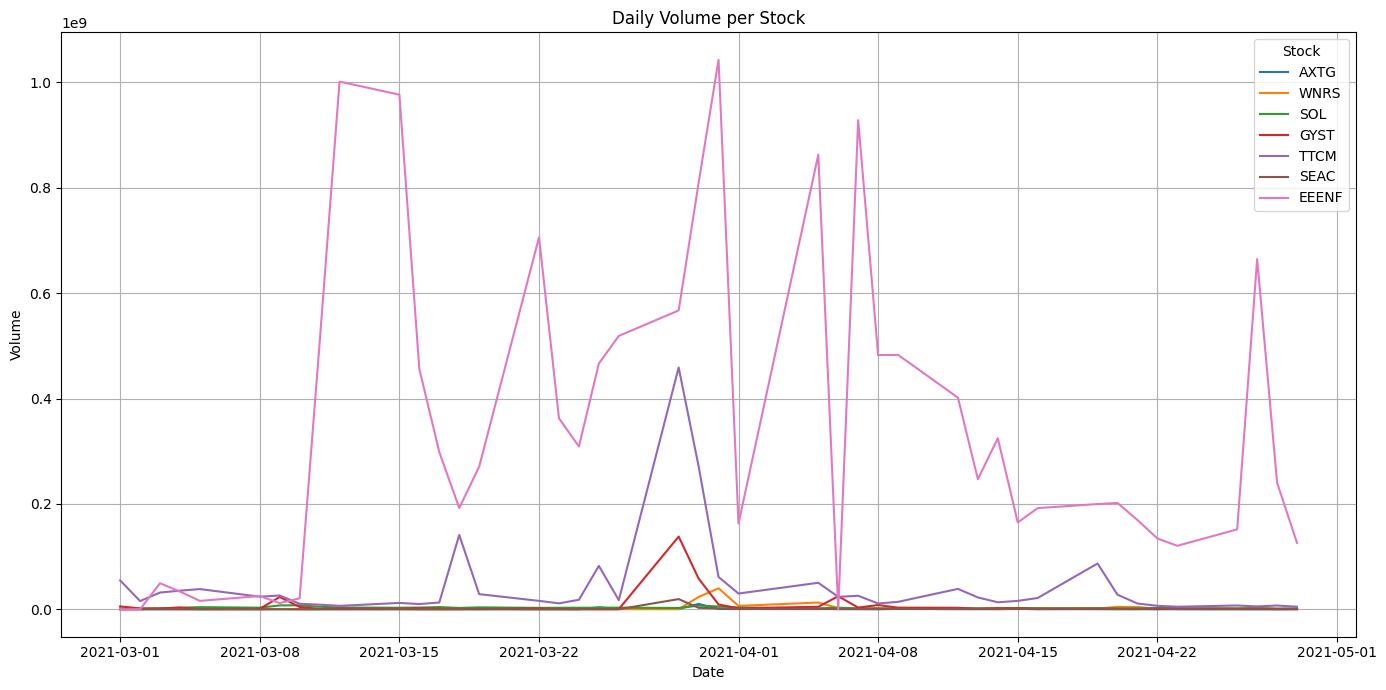

In [35]:
# Load CSV
stock_data = pd.read_csv("data/stock_movement.csv")

# Convert Date to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Create plot
plt.figure(figsize=(14, 7))

# Plot volume per stock
for stock in stock_data['Stock'].unique():
    stock_df = stock_data[stock_data['Stock'] == stock]
    stock_df = stock_df.sort_values('Date')
    if not stock_df.empty:
        plt.plot(stock_df['Date'], stock_df['Volume'], label=stock)



plt.title('Daily Volume per Stock')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Stock')
plt.grid(True)
plt.tight_layout()
plt.show()


### Average change per day (Percentage amount)

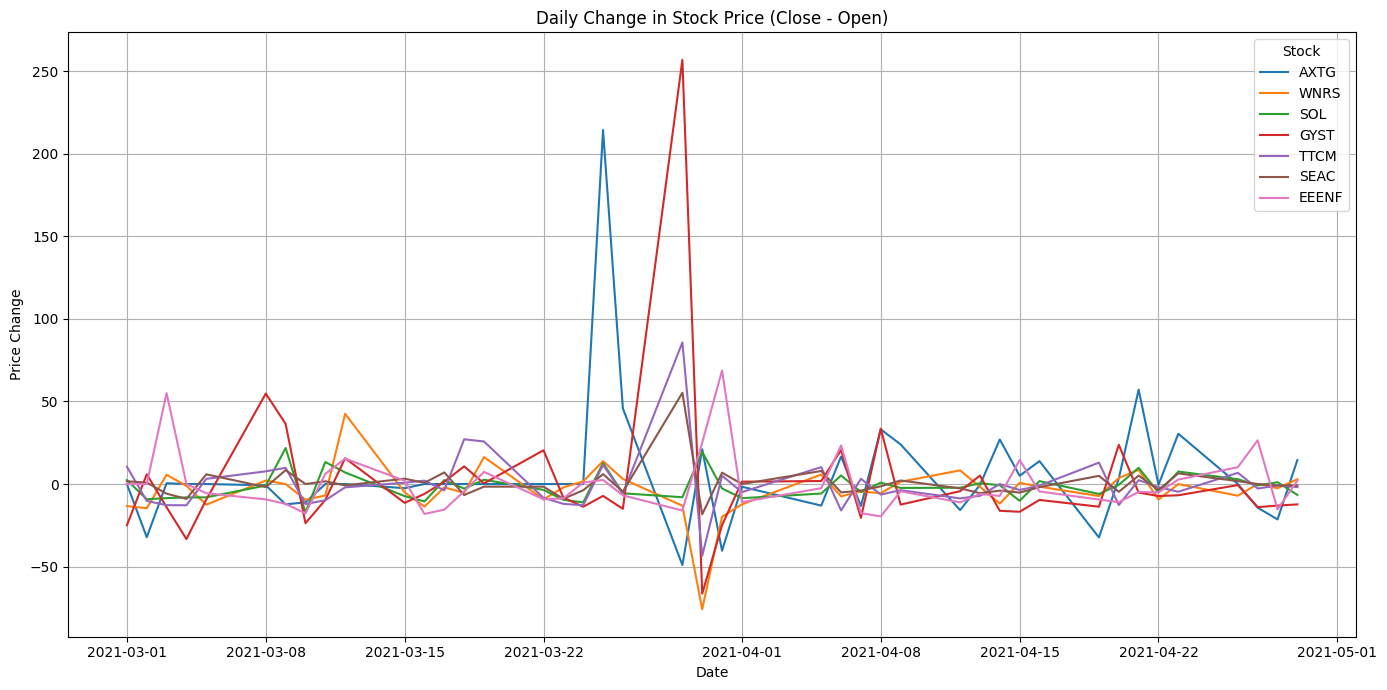

In [43]:

# Compute daily change per stock
stock_data['PctChange'] = (stock_data['Close'] - stock_data['Open']) / stock_data['Open'] * 100

# Plot daily price change per stock
plt.figure(figsize=(14, 7))

for stock in stock_data['Stock'].unique():
    stock_df = stock_data[stock_data['Stock'] == stock].sort_values('Date')
    if not stock_df.empty:
        plt.plot(stock_df['Date'], stock_df['PctChange'], label=stock)

plt.title('Daily Change in Stock Price (Close - Open)')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend(title='Stock')
plt.grid(True)
plt.tight_layout()
plt.show()
